In [80]:
from iminuit import Minuit
def f(x, y, z):
    return (x - 2) ** 2 + (y - 3) ** 2 + (z - 4) ** 2
m = Minuit(f)
m.migrad()
print(m.values)  # {'x': 2,'y': 3,'z': 4}
print(m.errors)  # {'x': 1,'y': 1,'z': 1}

FCN = 1.62389076464e-22 
 TOTAL NCALL = 36 
 NCALLS = 36 
 
 
 EDM = 1.62388025554e-22 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,x,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,,,
2,y,3.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,,,
3,z,4.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,,,


{'y': 3.000000000007099, 'x': 2.0000000000047327, 'z': 4.000000000009465}
{'y': 1.0000000000002762, 'x': 1.0000000000000409, 'z': 0.9999999999998322}


In [81]:
%pylab inline

import numpy as np

import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


FCN = 14057.15295 
 TOTAL NCALL = 81 
 NCALLS = 81 
 
 
 EDM = 4.88684316839e-07 
 GOAL EDM = 5e-06 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,mean,-1.810189e-02,9.868631e-03,0.000000e+00,0.000000e+00,,,
2,sigma,9.868629e-01,6.978164e-03,0.000000e+00,0.000000e+00,,,


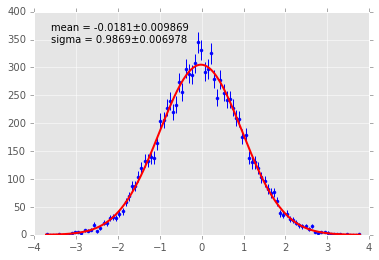

In [82]:
import numpy as np
from iminuit import Minuit
from probfit import UnbinnedLH, gaussian
data = np.random.randn(10000)
unbinned_likelihood = UnbinnedLH(gaussian, data)
minuit = Minuit(unbinned_likelihood, mean=1.1, sigma=3.1)
minuit.migrad()
_ = unbinned_likelihood.draw(minuit);

The following is from http://nbviewer.jupyter.org/github/iminuit/probfit/blob/master/tutorial/tutorial.ipynb

In [83]:
# We assume you have executed this cell in all the following examples
import numpy as np
import matplotlib.pyplot as plt
import iminuit
import probfit

matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)

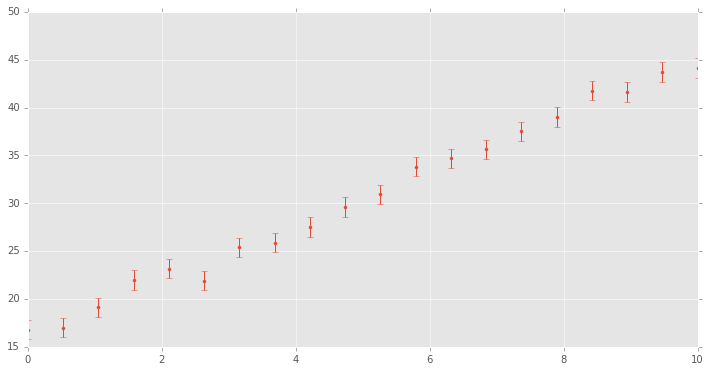

In [84]:
# Let's make a straight line with gaussian(mu=0, sigma=1) noise
np.random.seed(0)
x = np.linspace(0, 10, 20) 
y = 3 * x + 15 + np.random.randn(len(x))
err = np.ones(len(x))
plt.errorbar(x, y, err, fmt='.');

In [85]:
# Let's define our line.
# First argument has to be the independent variable,
# arguments after that are shape parameters.
def line(x, m, c): # define it to be parabolic or whatever you like
    return m * x + c

In [86]:
iminuit.describe(line)

['x', 'm', 'c']

In [87]:
# Define a chi^2 cost function
chi2 = probfit.Chi2Regression(line, x, y, err)

In [88]:
# Chi2Regression is just a callable object; nothing special about it
iminuit.describe(chi2)

['m', 'c']

In [89]:
# minimize it
# yes, it gives you a heads up that you didn't give it initial value
# we can ignore it for now
minuit = iminuit.Minuit(chi2) # see iminuit tutorial on how to give initial value/range/error
_ = minuit.migrad(); # MIGRAD is a very stable robust minimization method
# you can look at your terminal to see what it is doing;

FCN = 12.0738531135 
 TOTAL NCALL = 36 
 NCALLS = 36 
 
 
 EDM = 1.10886029888e-21 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,m,2.886277e+00,7.367884e-02,0.000000e+00,0.000000e+00,,,
2,c,1.613795e+01,4.309458e-01,0.000000e+00,0.000000e+00,,,


In [90]:
# The output above is a pretty-printed summary of the fit results from
# minuit.print_fmin()
# which was automatically called by iminuit.Minuit.migrad() after running MIGRAD.

# Let's see our results as Python dictionaries ...
print(minuit.values)
print(minuit.errors)

{'c': 16.137947520534624, 'm': 2.8862774144823855}
{'c': 0.4309458211385722, 'm': 0.07367884284273937}


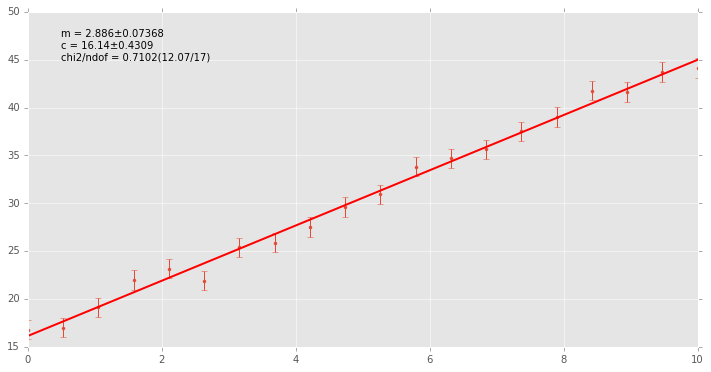

In [91]:
# Let's visualize our line
_ = chi2.draw(minuit);
# looks good;

In [92]:
# Sometimes we want the error matrix (a.k.a. covariance matrix)
print('error matrix:')
print(minuit.matrix())
# or the correlation matrix
print('correlation matrix:')
print(minuit.matrix(correlation=True))
# or a pretty html representation
# Note that `print_matrix()` shows the correlation matrix, not the error matrix
minuit.print_matrix()

error matrix:
((0.005428571882645087, -0.027142859751431703), (-0.027142859751431703, 0.18571430075679826))
correlation matrix:
((1.0, -0.8548504260481388), (-0.8548504260481388, 1.0))


+,m,c
m,1.00,-0.85
c,-0.85,1.00


Now we try to fit our dipole...

In [93]:
import lmfit
from scipy.stats import norm

def gen_dipole2(x, amp1=1., sep1=1.):
    ypos = amp1 * norm.pdf(x,  sep1/2., 1)
    yneg = amp1 * norm.pdf(x, -sep1/2., 1)                  
    y = ypos - yneg
    return np.append(y, [ypos, yneg])

def gen_dipole(x, amp1=1., sep1=1.):
    #y = amp1 * (norm.pdf(x, -sep1/2., 1) - norm.pdf(x, sep1/2., 1))
    try:
        leng = len(x)
    except:
        leng = 1
    y = gen_dipole2(x, amp1, sep1)[:leng]
    return y

def fitDipole(ydata, xdata, amp1Start=3., sep1Start=2., fitFunc=gen_dipole, verbose=False):
    gmod = lmfit.Model(fitFunc, verbose=verbose)
    result = gmod.fit(ydata, x=xdata, amp1=amp1Start, sep1=sep1Start, verbose=verbose)

    if verbose: 
        print(result.fit_report(show_correl=False))
        ci = lmfit.conf_interval(result, result)
        lmfit.printfuncs.report_ci(ci)

    return result

 - Adding parameter "sep1"
 - Adding parameter "amp1"
[[Model]]
    Model(gen_dipole)
[[Fit Statistics]]
    # function evals   = 18
    # data points      = 40
    # variables        = 2
    chi-square         = 0.041
    reduced chi-square = 0.001
[[Variables]]
    sep1:   0.79968891 +/- 0.558867 (69.89%) (init= 1.5)
    amp1:   1.25114000 +/- 0.806661 (64.47%) (init= 1.5)

         99.70%    95.00%    67.40%    _BEST_    67.40%    95.00%    99.70%
 sep1:      -inf      -inf      -inf   0.79969  +0.42387  +0.74583  +1.04216
 amp1:  -0.64404  -0.54775  -0.39504   1.25114      +inf      +inf      +inf


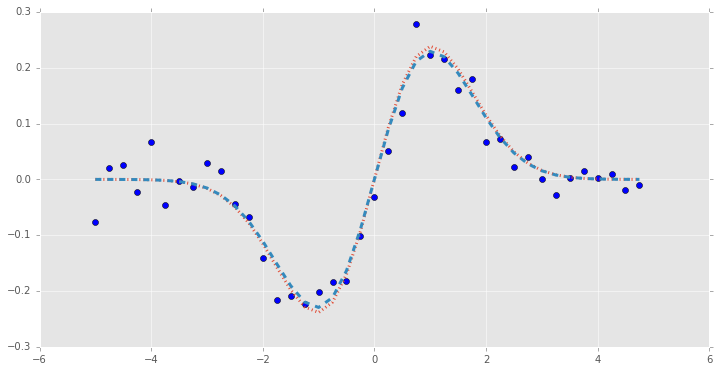

In [94]:
xdata = np.arange(-5, 5, 0.25)
ydataOrig = gen_dipole2(xdata, amp1=1.3, sep1=0.8)
ydataOrigNoisy = ydataOrig + np.random.normal(scale=0.03, size=ydataOrig.shape) ## save it for fitting below...
ydata = ydataOrigNoisy[:len(xdata)] 

result = fitDipole(ydata, xdata, amp1Start=1.5, sep1Start=1.5, fitFunc=gen_dipole, verbose=True)
plt.plot(xdata, ydata, 'bo')
plt.plot(xdata, ydataOrig[:len(xdata)], linewidth=3, linestyle='dotted')
plt.plot(xdata, result.best_fit, linewidth=3, linestyle='dashed')
plt.show()

In [95]:
## Try it with iminuit
iminuit.describe(gen_dipole)

['x', 'amp1', 'sep1']

In [96]:
err = np.ones(len(xdata)) * 0.03
chi2 = probfit.Chi2Regression(gen_dipole, xdata, ydata, err)
iminuit.describe(chi2)

['amp1', 'sep1']

In [97]:
# minimize it
# yes, it gives you a heads up that you didn't give it initial value
# we can ignore it for now
# see iminuit tutorial on how to give initial value/range/error
minuit = iminuit.Minuit(chi2, amp1=1.5, sep1=1.5, limit_amp1=(0.01,100.) )
_ = minuit.migrad(); # MIGRAD is a very stable robust minimization method
# you can look at your terminal to see what it is doing;

FCN = 45.9080001073 
 TOTAL NCALL = 43 
 NCALLS = 43 
 
 
 EDM = 4.13577657506e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,amp1,1.249694e+00,7.452022e-01,0.000000e+00,0.000000e+00,0.01,100.0,
2,sep1,8.006859e-01,5.168287e-01,0.000000e+00,0.000000e+00,,,


In [98]:
# The output above is a pretty-printed summary of the fit results from
# minuit.print_fmin()
# which was automatically called by iminuit.Minuit.migrad() after running MIGRAD.

# Let's see our results as Python dictionaries ...
print(minuit.values)
print(minuit.errors)

{'sep1': 0.8006858603357746, 'amp1': 1.2496941238765162}
{'sep1': 0.5168287259283878, 'amp1': 0.745202199458373}


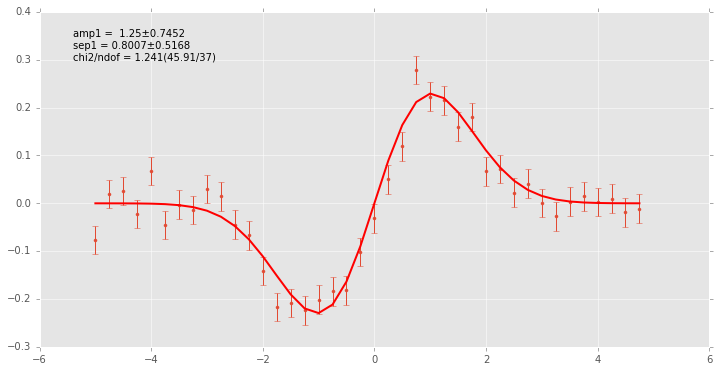

In [99]:
# Let's visualize our line
_ = chi2.draw(minuit);
# looks good;

iMinuit is about 250x faster!

In [100]:
import warnings
warnings.filterwarnings('ignore')

%timeit iminuit.Minuit(chi2, amp1=1.5, sep1=1.5 ) 
%timeit iminuit.Minuit(chi2) 
%timeit fitDipole(ydata, xdata, amp1Start=1.5, sep1Start=1.5, fitFunc=gen_dipole, verbose=False)

gmod = lmfit.Model(gen_dipole, verbose=False)
%timeit gmod.fit(ydata, x=xdata, amp1=1.5, sep1=1.5, verbose=False)

print 6700 / 24.2

10000 loops, best of 3: 21.9 µs per loop
The slowest run took 5.45 times longer than the fastest. This could mean that an intermediate result is being cached 
10000 loops, best of 3: 21.5 µs per loop
100 loops, best of 3: 5.59 ms per loop
100 loops, best of 3: 5.46 ms per loop
276.859504132


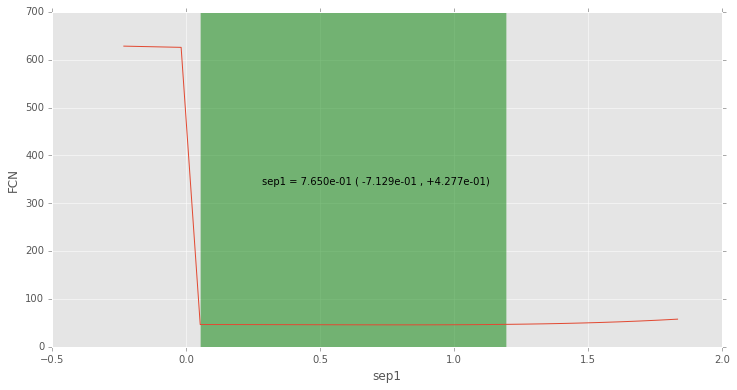

In [101]:
# Looking at a likelihood profile is a good method
# to check that the reported errors make sense
_ = minuit.draw_mnprofile('sep1');

In [102]:
# Plot a 2d contour error
# You can notice that it takes some time to draw
# This is because our PDF is defined in Python
# We will show how to speed this up later
# This is currently uninformative. How to improve?
if False:
    _ = minuit.draw_mncontour('amp1', 'sep1');

Add template and obs. image to constrain fit...

 - Adding parameter "sep1"
 - Adding parameter "amp1"
[[Model]]
    Model(gen_dipole2)
[[Fit Statistics]]
    # function evals   = 15
    # data points      = 120
    # variables        = 2
    chi-square         = 0.111
    reduced chi-square = 0.001
[[Variables]]
    sep1:   0.80927653 +/- 0.028564 (3.53%) (init= 1.5)
    amp1:   1.31403646 +/- 0.019833 (1.51%) (init= 1.5)

         99.70%    95.00%    67.40%    _BEST_    67.40%    95.00%    99.70%
 sep1:  -0.08580  -0.05638  -0.02824   0.80928  +0.02857  +0.05768  +0.08891
 amp1:  -0.06008  -0.03930  -0.01957   1.31404  +0.01958  +0.03935  +0.06019


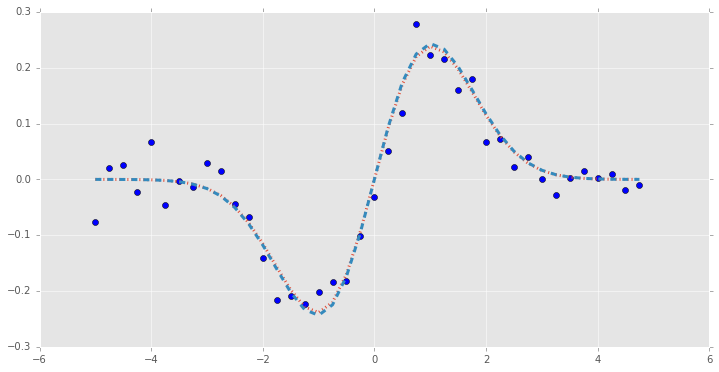

In [103]:
## Use same input data as above for direct comparison
ydata = ydataOrigNoisy
result = fitDipole(ydata, xdata, amp1Start=1.5, sep1Start=1.5, fitFunc=gen_dipole2, verbose=True)
plt.plot(xdata, ydata[:len(xdata)], 'bo')
plt.plot(xdata, ydataOrig[:len(xdata)], linewidth=3, linestyle='dotted')
plt.plot(xdata, result.best_fit[:len(xdata)], linewidth=3, linestyle='dashed')
plt.show()

In [115]:
## Try it with iminuit/probfit.
## probfit requires x (and hence y) to be a 1-d array, so we will have to play around with it
##   to get it to work.
## Here we encode xdata = [x, x+100, x+200] for the diffim, pos, and neg images respectively
def gen_dipole3(x, amp1=1., sep1=1.):
    xx = x
    if x >= 190:
        xx -= 200
    elif x >= 90:
        xx -= 100
    ypos = amp1 * norm.pdf(xx,  sep1/2., 1)
    yneg = amp1 * norm.pdf(xx, -sep1/2., 1)                  
    yout = ypos - yneg
    if x >= 190:
        yout = yneg
    elif x >= 90:
        yout = ypos
    return yout

print iminuit.describe(gen_dipole3)
xdata2 = np.append(xdata, [xdata+100, xdata+200])
ydata2 = ydataOrigNoisy.copy()

err = np.ones_like(xdata2) * 0.03
chi2 = probfit.Chi2Regression(gen_dipole3, xdata2, ydata2, err)
print iminuit.describe(chi2)

minuit = iminuit.Minuit(chi2, amp1=1.5, sep1=1.5, limit_amp1=(0.01,100.) )
_ = minuit.migrad();

['x', 'amp1', 'sep1']
['amp1', 'sep1']


FCN = 123.282895333 
 TOTAL NCALL = 39 
 NCALLS = 39 
 
 
 EDM = 2.19641068826e-07 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,amp1,1.314045e+00,1.941657e-02,0.000000e+00,0.000000e+00,0.01,100.0,
2,sep1,8.092734e-01,2.817002e-02,0.000000e+00,0.000000e+00,,,


{'sep1': 0.8092733711055475, 'amp1': 1.3140454111267705}
{'sep1': 0.02817002260467186, 'amp1': 0.01941656606340969}


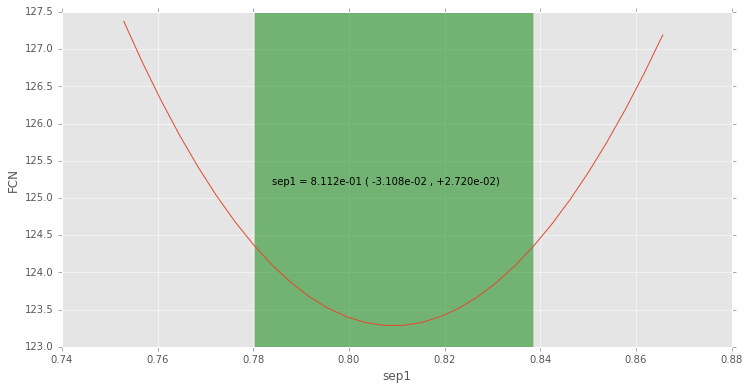

In [118]:
print(minuit.values)
print(minuit.errors)

#_ = chi2.draw(minuit);
# Looking at a likelihood profile is a good method
# to check that the reported errors make sense
_ = minuit.draw_mnprofile('sep1');

In [127]:
%timeit fitDipole(ydata, xdata, amp1Start=1.5, sep1Start=1.5, fitFunc=gen_dipole2, verbose=False)
%timeit iminuit.Minuit(chi2, amp1=1.5, sep1=1.5)

gmod = lmfit.Model(gen_dipole2, verbose=False)
%timeit gmod.fit(ydata, x=xdata, amp1=1.5, sep1=1.5, verbose=False)

print 5000/21.

100 loops, best of 3: 4.95 ms per loop
10000 loops, best of 3: 20.6 µs per loop
100 loops, best of 3: 4.97 ms per loop
238.095238095


### A nicer way:

Let's try doing this with `probfit.costfunc.SimultaneousFit`.

In [146]:
def gen_posImage(x, amp1=1., sep1=1.):
    ypos = amp1 * norm.pdf(x,  sep1/2., 1)
    return ypos

def gen_negImage(x, amp1=1., sep1=1.):
    yneg = amp1 * norm.pdf(x, -sep1/2., 1)
    return yneg

def gen_dipole3(x, amp1=1., sep1=1.):
    ypos = gen_posImage(x, amp1, sep1)
    yneg = gen_negImage(x, amp1, sep1)
    yout = ypos - yneg
    return yout

print iminuit.describe(gen_dipole3)
xdata2 = xdata.copy()
ydata2 = ydataOrigNoisy.copy()
err = np.ones_like(xdata2) * 0.03

poschi2 = probfit.Chi2Regression(gen_posImage, xdata2, ydata2[40:80],    err)
negchi2 = probfit.Chi2Regression(gen_negImage, xdata2, ydata2[80:120],  err)
difchi2 = probfit.Chi2Regression(gen_dipole3,  xdata2, ydata2[:40], err)

simchi2 = probfit.SimultaneousFit(difchi2, poschi2, negchi2)
print probfit.describe(simchi2)

minuit = iminuit.Minuit(simchi2, amp1=1.5, sep1=1.5, limit_amp1=(0.01,100.) )
_ = minuit.migrad();

['x', 'amp1', 'sep1']
['amp1', 'sep1']


FCN = 123.282895333 
 TOTAL NCALL = 39 
 NCALLS = 39 
 
 
 EDM = 2.19641105457e-07 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,amp1,1.314045e+00,1.941657e-02,0.000000e+00,0.000000e+00,0.01,100.0,
2,sep1,8.092734e-01,2.817002e-02,0.000000e+00,0.000000e+00,,,


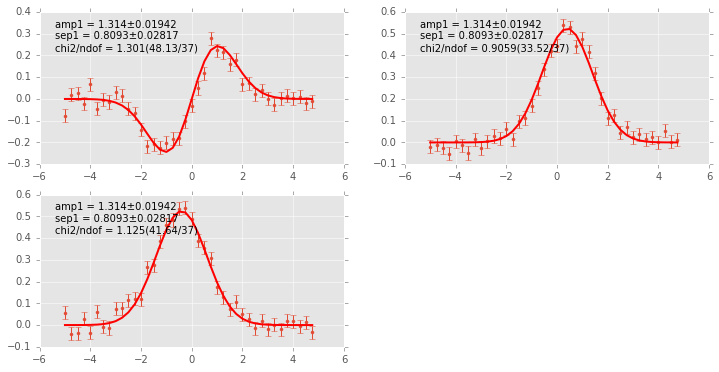

In [147]:
# Let's visualize our line
_ = simchi2.draw(minuit);
# looks good;

In [148]:
%timeit fitDipole(ydata, xdata, amp1Start=1.5, sep1Start=1.5, fitFunc=gen_dipole2, verbose=False)
%timeit iminuit.Minuit(simchi2, amp1=1.5, sep1=1.5)

gmod = lmfit.Model(gen_dipole2, verbose=False)
%timeit gmod.fit(ydata, x=xdata, amp1=1.5, sep1=1.5, verbose=False)

print 5000/21.

100 loops, best of 3: 5.03 ms per loop
10000 loops, best of 3: 21.8 µs per loop
100 loops, best of 3: 4.97 ms per loop
238.095238095
